<a href="https://colab.research.google.com/github/LinarKulinar/Data-Analysis-Tools-SSAU/blob/main/Lab_4_Trees_6133_Akhmetov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 4**

# Деревья решений

Выполнил: 6133, Ахметов Линар

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics as metr
from sklearn.metrics import classification_report
import sklearn.pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Данные представляет размеченый датасет с различными генетическими мутациями.

Скачать можно на [kaggle](https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting).

In [2]:
df = pd.read_csv('clinvar_conflicting.csv', dtype={0: object, 38: str, 40: object})
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [3]:
df = df.drop(["CLNDN",'CLNDISDBINCL','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE','DISTANCE','CLNHGVS','CLNDISDB',"CLNDNINCL",'CLNSIGINCL','SSR','INTRON','Codons','MC','CLNVI','SYMBOL','Amino_acids','Protein_position','CDS_position','EXON','cDNA_position','Feature', 'Feature_type','BAM_EDIT'], axis=1)
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNVC,ORIGIN,CLASS,...,Consequence,IMPACT,BIOTYPE,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,single_nucleotide_variant,1,0,...,missense_variant,MODERATE,protein_coding,1.0,tolerated,benign,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,single_nucleotide_variant,1,0,...,missense_variant,MODERATE,protein_coding,-1.0,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,single_nucleotide_variant,35,1,...,missense_variant,MODERATE,protein_coding,-1.0,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,single_nucleotide_variant,33,0,...,missense_variant,MODERATE,protein_coding,1.0,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,single_nucleotide_variant,33,0,...,missense_variant,MODERATE,protein_coding,1.0,NaN,NaN,NaN,24.700,4.766224,-3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHROM        65188 non-null  object 
 1   POS          65188 non-null  int64  
 2   REF          65188 non-null  object 
 3   ALT          65188 non-null  object 
 4   AF_ESP       65188 non-null  float64
 5   AF_EXAC      65188 non-null  float64
 6   AF_TGP       65188 non-null  float64
 7   CLNVC        65188 non-null  object 
 8   ORIGIN       65188 non-null  int64  
 9   CLASS        65188 non-null  int64  
 10  Allele       65188 non-null  object 
 11  Consequence  65188 non-null  object 
 12  IMPACT       65188 non-null  object 
 13  BIOTYPE      65172 non-null  object 
 14  STRAND       65174 non-null  float64
 15  SIFT         24836 non-null  object 
 16  PolyPhen     24796 non-null  object 
 17  LoFtool      60975 non-null  float64
 18  CADD_PHRED   64096 non-null  float64
 19  CADD

# 1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [5]:
df = pd.concat([df, pd.get_dummies(df['CHROM'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['IMPACT'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['BIOTYPE'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['CLNVC'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['PolyPhen'], drop_first=True)], axis=1)

df = df.drop(['CHROM', 'IMPACT', 'BIOTYPE', 'CLNVC', 'PolyPhen'], axis=1)

In [6]:
df.head()

,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,Allele,Consequence,...,protein_coding,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant,possibly_damaging,probably_damaging,unknown
0,1168180,G,C,0.0771,0.10020,0.1066,1,0,C,missense_variant,...,1,0,0,0,0,0,1,0,0,0
1,1470752,G,A,0.0000,0.00000,0.0000,1,0,A,missense_variant,...,1,0,0,0,0,0,1,0,0,0
2,1737942,A,G,0.0000,0.00001,0.0000,35,1,G,missense_variant,...,1,0,0,0,0,0,1,0,1,0
3,2160305,G,A,0.0000,0.00000,0.0000,33,0,A,missense_variant,...,1,0,0,0,0,0,1,0,0,0
4,2160305,G,T,0.0000,0.00000,0.0000,33,0,T,missense_variant,...,1,0,0,0,0,0,1,0,0,0


In [7]:
df['Consequence'] = pd.factorize(df['Consequence'])[0]
df['REF'] = pd.factorize(df['REF'])[0]
df['ALT'] = pd.factorize(df['ALT'])[0]
df['SIFT'] = pd.factorize(df['SIFT'])[0]
df['Allele'] = pd.factorize(df['Allele'])[0]

In [8]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   POS                        65188 non-null  int64  
 1   REF                        65188 non-null  int64  
 2   ALT                        65188 non-null  int64  
 3   AF_ESP                     65188 non-null  float64
 4   AF_EXAC                    65188 non-null  float64
 5   AF_TGP                     65188 non-null  float64
 6   ORIGIN                     65188 non-null  int64  
 7   CLASS                      65188 non-null  int64  
 8   Allele                     65188 non-null  int64  
 9   Consequence                65188 non-null  int64  
 10  STRAND                     65188 non-null  float64
 11  SIFT                       65188 non-null  int64  
 12  LoFtool                    65188 non-null  float64
 13  CADD_PHRED                 65188 non-null  flo

# 1.1. С помощью `sklearn.preprocessing.StandardScaler` нормализовать значения признаков и построить для нормализовапнного датасета `KNeighborsClassifier` (без использования конвееров)

In [9]:
scaler = StandardScaler()

In [10]:
X = df.drop(columns=['CLASS'])
y = df.CLASS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [11]:
#нормируем данные:
scaler.fit(X_train) 
tdtr = scaler.transform(X_train)
tdt = scaler.transform(X_test)

In [12]:
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(tdtr, y_train)
cl1 = clf.predict(tdt)

In [13]:
#доля правильных ответов:
metr.accuracy_score(y_test, cl1) 

0.7188439590108608

# 1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

In [14]:
knn_pipe = sklearn.pipeline.Pipeline([ 
    ('scaler', sklearn.preprocessing.StandardScaler()), 
    ('knn', sklearn.neighbors.KNeighborsClassifier(n_jobs=-1))
])
knn_pipe.fit(tdtr,y_train) #вызываемые методы должны совпадать у всех объектов пайплайна
cl2 = knn_pipe.predict(tdt)
metr.accuracy_score(y_test, cl2) #доля правильных ответов

0.7188439590108608

# 1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [15]:
knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

knn_params = { 'n_neighbors': range(3, 17) } 

knn_grid = sklearn.model_selection.GridSearchCV(knn, knn_params) 

knn_grid.fit(tdtr, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': range(3, 17)})

In [16]:
#получаем оптимальные параметры для заданного классификатора:
knn_grid.best_params_, knn_grid.best_score_ 

({'n_neighbors': 16}, 0.7415679563976479)

In [17]:
#доля правильных ответов:
metr.accuracy_score(y_test, knn_grid.predict(tdt)) 

0.7469472909124378

# 2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

In [ ]:
clf_tree = DecisionTreeClassifier( 
    criterion = 'entropy', max_depth = 3, random_state = 42
)
clf_tree.fit(tdtr, y_train)
cl_t = clf_tree.predict(tdt)
metr.accuracy_score(y_test, cl_t)

0.7493403693931399

In [ ]:
print("Classification Report :\n ", classification_report(cl_t, y_test))

Classification Report :
                precision    recall  f1-score   support

           0       1.00      0.75      0.86     16297
           1       0.00      0.00      0.00         0

    accuracy                           0.75     16297
   macro avg       0.50      0.37      0.43     16297
weighted avg       1.00      0.75      0.86     16297



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree_params = {'max_depth': range(1, 25),
              'max_features': range(2, 20)}

tree_grid = GridSearchCV(tree, tree_params) #подбираем параметры для дерева

tree_grid.fit( tdtr, y_train )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 25),
                         'max_features': range(2, 20)},
             pre_dispatch

In [ ]:
#оптимальные параметры:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 10, 'max_features': 13}, 0.7492994620686834)

In [ ]:
#доля правильных ответов:
metr.accuracy_score(y_test, tree_grid.predict(tdt)) 

0.7471927348591766

# 2.3 Для полученного наилучшего дерева построить график `feature_importances` и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

In [ ]:
clf_tree.feature_importances_ 

array([0.        , 0.        , 0.        , 0.05649671, 0.45452733,
       0.42117943, 0.        , 0.        , 0.06779653, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
y = pd.Series(data=clf_tree.feature_importances_, index=X.columns)
ind = y[:] == 0
y = y[~ind]

([<matplotlib.axis.XTick at 0x7fe1712a4208>,
 <a list of 4 Text xticklabel objects>)

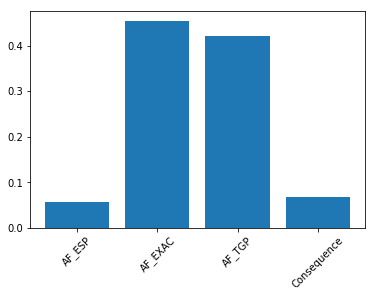

In [ ]:
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, y.index,rotation = 45)

In [ ]:
y.sort_values()

AF_ESP         0.056497
Consequence    0.067797
AF_TGP         0.421179
AF_EXAC        0.454527
dtype: float64

# 3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=8, random_state=42)
rf_clf.fit(tdtr, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
metr.accuracy_score(y_test, rf_clf.predict(tdt))

0.7487881205129778

# 3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [ ]:
forest_params = {
    'max_depth': range(1,24),
    'max_features': range(3,15)
}

forest_grid = sklearn.model_selection.GridSearchCV(rf_clf, forest_params, cv=5)

forest_grid.fit(tdtr, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=8, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_d

In [ ]:
#оптимальные параметры
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 16, 'max_features': 13}, 0.7597308298050766)

# 4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

Ответ: наилучший результат дал алгоритм случайного леса с точностью: 0.76 при параметрах глубины дерева: 16 и максимальным набором параметров для рассмотрения 13.